In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
print("No Warning Shown")


df = pd.read_csv('dataset_SCL.csv', delimiter=',') #Abrir el data set y convertir en dataframe

df.head(2)

No Warning Shown


,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami


# 1. ¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto?

**Conociendo el data set**

Puesto que no conozco el contenido de las variables del data set, se hace una pequeña exploración

In [2]:
df.describe()

,DIA,MES,AÑO
count,68206.000000,68206.000000,68206.000000
mean,15.714790,6.622585,2017.000029
std,8.782886,3.523321,0.005415
min,1.000000,1.000000,2017.000000
25%,8.000000,3.000000,2017.000000
50%,16.000000,7.000000,2017.000000
75%,23.000000,10.000000,2017.000000
max,31.000000,12.000000,2018.000000


In [3]:
#Te revisa el contenido de las carcateristcas

df.head(3).T

,0,1,2
Fecha-I,2017-01-01 23:30:00,2017-01-02 23:30:00,2017-01-03 23:30:00
Vlo-I,226,226,226
Ori-I,SCEL,SCEL,SCEL
Des-I,KMIA,KMIA,KMIA
Emp-I,AAL,AAL,AAL
Fecha-O,2017-01-01 23:33:00,2017-01-02 23:39:00,2017-01-03 23:39:00
Vlo-O,226,226,226
Ori-O,SCEL,SCEL,SCEL
Des-O,KMIA,KMIA,KMIA
Emp-O,AAL,AAL,AAL


In [4]:
print(df.shape)

(68206, 18)


descripción de las columnas del data set

In [5]:
df_dict = pd.read_csv('diccionario.csv', delimiter=',') # se abre el diccionario de datos


df_dict.head(2)

,features,description,Unnamed: 2,Unnamed: 3
0,Fecha-I,Fecha y hora programada del vuelo.,NaN,NaN
1,Vlo-I,Número de vuelo programado.,NaN,NaN


In [6]:
flies_dtypes = pd.DataFrame(df.dtypes, columns=['dtypes'])
flies_dtypes = flies_dtypes.reset_index()
flies_dtypes['name'] = flies_dtypes['index']
flies_dtypes = flies_dtypes[['name','dtypes']]
flies_dtypes['first value'] = df.loc[0].values

**Extrayendo diccionario de datos**

In [7]:
#Dado que vienen un par de campos sin nombre, se procede a renombrar
#Estos campos dicen relación con los valores de las varaibles categoricas
#Particularmente la variable TIPO VUELO
df_dict.rename(columns={"Unnamed: 2": "Valor1", "Unnamed: 3": "Valor2"}, inplace=True)
df_dict

,features,description,Valor1,Valor2
0,Fecha-I,Fecha y hora programada del vuelo.,NaN,NaN
1,Vlo-I,Número de vuelo programado.,NaN,NaN
2,Ori-I,Código de ciudad de origen programado.,NaN,NaN
3,Des-I,Código de ciudad de destino programado.,NaN,NaN
4,Emp-I,Código aerolínea de vuelo programado.,NaN,NaN
5,Fecha-O,Fecha y hora de operación del vuelo.,NaN,NaN
6,Vlo-O,Número de vuelo de operación del vuelo.,NaN,NaN
7,Ori-O,Código de ciudad de origen de operación,NaN,NaN
8,Des-O,Código de ciudad de destino de operación.,NaN,NaN
9,Emp-O,Código aerolínea de vuelo operado.,NaN,NaN


se renombra la columna features proveniente del diccionario, para que al cruzar flies_dtypes con df_dict no se duplique la columna con el nombre de las caracteristicas

se crea una data frame con el resumen de todas las variables y su contenido, de tal manera se tiene una mejor comprension de los datos que fueron entregados

In [8]:
df_dict.rename(columns={"features": "name",}, inplace=True)
preview = flies_dtypes.merge(df_dict, on='name', how='left')
preview

,name,dtypes,first value,description,Valor1,Valor2
0,Fecha-I,object,2017-01-01 23:30:00,Fecha y hora programada del vuelo.,NaN,NaN
1,Vlo-I,object,226,Número de vuelo programado.,NaN,NaN
2,Ori-I,object,SCEL,Código de ciudad de origen programado.,NaN,NaN
3,Des-I,object,KMIA,Código de ciudad de destino programado.,NaN,NaN
4,Emp-I,object,AAL,Código aerolínea de vuelo programado.,NaN,NaN
5,Fecha-O,object,2017-01-01 23:33:00,Fecha y hora de operación del vuelo.,NaN,NaN
6,Vlo-O,object,226,Número de vuelo de operación del vuelo.,NaN,NaN
7,Ori-O,object,SCEL,Código de ciudad de origen de operación,NaN,NaN
8,Des-O,object,KMIA,Código de ciudad de destino de operación.,NaN,NaN
9,Emp-O,object,AAL,Código aerolínea de vuelo operado.,NaN,NaN


donde:
* **names**:Nombre de la caracteristica
* **dtypes**:tipo de dato de la caracteristica
* **first value**:primer valor del data set
* **description**: descripción de la variable
* **valor1**:primer valor del data set en caso de ser categorica
* **valor2**:segundo valor del data set en caso de ser categorica

Para cualquier operación con fechas es necesario que los campos tengan el formato adecuado (datetime). Por lo que se procede a convertir el formato

In [9]:
df["Fecha-I"] = pd.to_datetime(df["Fecha-I"])
df["Fecha-O"] = pd.to_datetime(df["Fecha-O"])
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


In [10]:
print('la primera fecha del dataset es', df["Fecha-I"].min())
print('la última fecha del dataset es', df["Fecha-I"].max())

la primera fecha del dataset es 2017-01-01 00:15:00
la última fecha del dataset es 2017-12-31 23:55:00


Se comprueba que los tipos de datos sean los correctos

In [11]:
df.dtypes

Fecha-I      datetime64[ns]
Vlo-I                object
Ori-I                object
Des-I                object
Emp-I                object
Fecha-O      datetime64[ns]
Vlo-O                object
Ori-O                object
Des-O                object
Emp-O                object
DIA                   int64
MES                   int64
AÑO                   int64
DIANOM               object
TIPOVUELO            object
OPERA                object
SIGLAORI             object
SIGLADES             object
dtype: object

In [12]:
print(df.isnull().sum())

Fecha-I      0
Vlo-I        0
Ori-I        0
Des-I        0
Emp-I        0
Fecha-O      0
Vlo-O        1
Ori-O        0
Des-O        0
Emp-O        0
DIA          0
MES          0
AÑO          0
DIANOM       0
TIPOVUELO    0
OPERA        0
SIGLAORI     0
SIGLADES     0
dtype: int64


Solo se observa un valor nulo en la variable "Fecha-O"

**Analsis de la data**

una vez que se tiene más claro el contenido del data set, se procede revisar distribuciones

Al revisar el data set fue posible identificar que la mayoria de las variables son categoricas, por lo cual se hace una pequeña revisión del contenido de estas

In [13]:
cols = ['Vlo-I', 'Ori-I','Des-I', 'Emp-I', 'Vlo-O', 'Ori-O','Des-O', 'Emp-O', 'TIPOVUELO', 'DIANOM','OPERA', 'SIGLAORI', 'SIGLADES']
for name in cols:
    print(name,':')
    print(df[name].value_counts(),'\n')

Vlo-I :
174     686
11      645
116     608
150     557
162     553
       ... 
1158      1
368       1
9955      1
9701      1
1218      1
Name: Vlo-I, Length: 750, dtype: int64 

Ori-I :
SCEL    68206
Name: Ori-I, dtype: int64 

Des-I :
SCFA    5787
SPJC    5270
SCCF    5145
SCTE    4357
SCIE    3995
        ... 
SBFI       1
SPSO       1
SEQU       1
SEQM       1
SARI       1
Name: Des-I, Length: 64, dtype: int64 

Emp-I :
LAN    37611
SKU    14298
TAM     3049
ARG     1949
CMP     1850
LAW     1574
AVA     1152
JAT     1095
GLO      806
AAL      757
ACA      565
IBE      362
AFR      358
DAL      358
AMX      351
UAL      335
ONE      279
AZA      259
KLM      251
LAP      216
BAW      205
QFU      195
JMR      100
LRC       92
AUT       74
PUE       49
LXP        9
LPE        4
DSM        2
LNE        1
Name: Emp-I, dtype: int64 

Vlo-O :
174      649
11       646
116      608
150      517
704      514
        ... 
356        1
1148       1
846A       1
4950       1
180.0      1
N

Lo primero que puedo notar esta información es que:

* Se observa una gran diferencia en la cantidad de vuelos programados de algunas aerlos y su disminución en la operación.
* Existe una proporción similar entre vuelos nacionales e internacionales
* La distribución de viajes diarios es bastante similar.
* Los viajes nacionales se concentran donde existe una alta actividad economica como producción de cobre en el norte
* Los viajes internacionales se concentran más en los paises más cercanos.

Se estudiará en mas detalle el porque del cambio tan abrupto de aerolineas que programan versus las que operan.

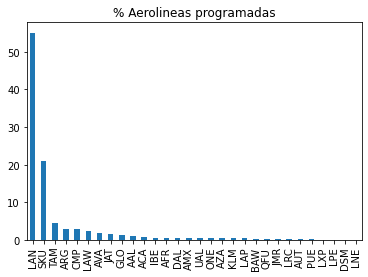

In [14]:
# gráfico de barras de frecuencias relativas.

plot = (100*df['Emp-I'].value_counts()/len(df['Emp-I'])).plot(kind='bar', title='% Aerolineas programadas')

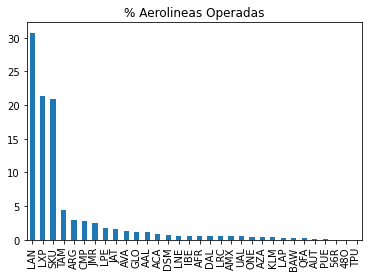

In [15]:
plot2=(100*df['Emp-O'].value_counts()/len(df['Emp-O'])).plot(kind='bar', title='% Aerolineas Operadas')

En general se mantiene la tendencia de que las aerolines que mas programan son las que mas operan, también es destacable que existen códigos de aerolineas que tenian muy baja participación en cuanto a programación y luego adquieren mayor relevancia en la operación, como por ejemplo LXP y JMR. 

Se puede observar que LAN disminuye cerca de un 20% en la participación de aerolineas que operan, cuya particación es absrovida por LXP.

In [16]:
print(df['OPERA'][df['Emp-O']=='LXP'].head(1))
print(df['OPERA'][df['Emp-O']=='JMR'].head(1))

3334    Grupo LATAM
Name: OPERA, dtype: object
6069    Latin American Wings
Name: OPERA, dtype: object


Al revisar cuales son estas aerolines, aparentemente se tratan de aerolineas que cubren las operaciones de otras.

**A modo de hipotesis**, es posible que haya una relación directa entre el cambio de los itinerarios de los vuelos programados.

Suponiendo que el atraso de un vuelo se refleja en el cambio de hora y esto es sabido luego de conocer los nuevos itinerarios de los vuelos.

In [17]:
df['cambio_vuelo']=np.where(df['Vlo-I']==df['Vlo-O'],0,1)
df['cambio_Destino']=np.where(df['Des-I']==df['Des-O'],0,1)
df['cambio_emp']=np.where(df['Emp-I']==df['Emp-O'],0,1)

In [18]:
df['cambio_vuelo'].value_counts()

0    66356
1     1850
Name: cambio_vuelo, dtype: int64

In [19]:
df['cambio_Destino'].value_counts()

0    68178
1       28
Name: cambio_Destino, dtype: int64

In [20]:
df['cambio_emp'].value_counts()

0    49537
1    18669
Name: cambio_emp, dtype: int64

El cambio más significativo es el del código de la aerolinea preagada.

Ahora se revisa la proporción entre vuelos progamados que luego son operados por otra aerolinea

In [21]:
df_res = df.groupby('Emp-I').agg({'Emp-I': 'count',
                                  'cambio_emp': 'sum'})

df_res['prop']=(df_res['cambio_emp']/df_res['Emp-I']).sort_values(ascending = True)

In [22]:
df_res.sort_values(by='prop', ascending = False)

,Emp-I,cambio_emp,prop
Emp-I,,,
QFU,195,195,1.000000
LAW,1574,1574,1.000000
LAN,37611,16623,0.441972
AVA,1152,267,0.231771
AUT,74,2,0.027027
ARG,1949,5,0.002565
TAM,3049,3,0.000984
AAL,757,0,0.000000
SKU,14298,0,0.000000


Lo mas destacable es que existen aerolineas que todos sus vuelos programados cambian en la operación, como lo es QFU y LAW.

Como se mensiono anteriormente LAN tambien cambia bastante

A continuación se revisa como se distribuyen las operaciones de los vuelos programados

In [23]:
pd.crosstab(df['Emp-I'][df['Emp-I']=='QFU'], df['Emp-O'][df['Emp-I']=='QFU'])

Emp-O,QFA
Emp-I,
QFU,195


In [24]:
pd.crosstab(df['Emp-I'][df['Emp-I']=='LAW'], df['Emp-O'][df['Emp-I']=='LAW'])

Emp-O,48O,56R,JMR
Emp-I,,,
LAW,10,17,1547


In [25]:
pd.crosstab(df['Emp-I'][df['Emp-I']=='LAN'], df['Emp-O'][df['Emp-I']=='LAN'])

Emp-O,DSM,LAN,LNE,LPE,LXP
Emp-I,,,,,
LAN,491,20988,373,1210,14549


In [26]:
pd.crosstab(df['Emp-I'][df['Emp-I']=='AVA'], df['Emp-O'][df['Emp-I']=='AVA'])

Emp-O,AVA,LRC,TPU
Emp-I,,,
AVA,885,265,2


# 2. Genera las columnas adicionales y luego expórtelas en un archivo synthetic_features.csv

Desagregando el campo de fecha-I, es decir, generando columnas nuevas para el mes, día y hora contenidos en el campo original se hace más facil poder calcular las variables solicitadas.

In [27]:
#se importa la libreria datetime para poder cambiar formato de fecha
from datetime import datetime

#Campo con fecha en formato "Mmm dd"
df['md-I']=[datetime.strftime(x,'%b %d') for x in df['Fecha-I']]
#Se desagrega el campo "Fecha-I", separandolos en día, mes y hora
#Se crea la columna que contiene el número del mes
df['m-I']=[datetime.strftime(x,'%m') for x in df['Fecha-I']]
#Se crea la columna que contiene el número del día
df['d-I']=[datetime.strftime(x,'%d') for x in df['Fecha-I']]
#Se crea la columna que contiene el numero de la hora
df['h-I']=[datetime.strftime(x,'%H') for x in df['Fecha-I']]

#Para poder hacer operaciones matemáticas con estas columnas, es necesario convertirlos a enteros.
df['m-I']=df['m-I'].astype(int)
df['d-I']=df['d-I'].astype(int)
df['h-I']=df['h-I'].astype(int)

Se comprueba que los tipos de datos sean los correctos

In [28]:
df.dtypes

Fecha-I           datetime64[ns]
Vlo-I                     object
Ori-I                     object
Des-I                     object
Emp-I                     object
Fecha-O           datetime64[ns]
Vlo-O                     object
Ori-O                     object
Des-O                     object
Emp-O                     object
DIA                        int64
MES                        int64
AÑO                        int64
DIANOM                    object
TIPOVUELO                 object
OPERA                     object
SIGLAORI                  object
SIGLADES                  object
cambio_vuelo               int64
cambio_Destino             int64
cambio_emp                 int64
md-I                      object
m-I                        int64
d-I                        int64
h-I                        int64
dtype: object

Creación del campo "**temporada_alta**"

temporada_alta : 1 si Fecha-I está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no.

In [29]:
df['temporada_alta'] = np.where((df['m-I']==1)|(df['m-I']==2),1,
                             np.where((df['m-I']==3)&(df['d-I']<=3),1,
                                  np.where((df['m-I']==7)&(df['d-I']>=15),1,
                                       np.where((df['m-I']==9)&(df['d-I']>=11),1,
                                            np.where((df['m-I']==12)&(df['d-I']>=15),1,0)))))

Creación del campo "**dif_min**"

para obtener la cantidad de minutos de atraso, se resta la fecha programada con la de operación y se pasa a segundos luego a mintutos

In [30]:
df['dif_min']=((df['Fecha-O']-df['Fecha-I']).dt.seconds)/60

Dado que es posible que los aviones despeguen antes de lo programado, se crea la restrición:

si la fecha programada es mayor o igual a la fecha de operación los minutos de atraso serán 0.

In [31]:
df['dif_min'] = np.where((df['Fecha-I']>=df['Fecha-O']),0,df['dif_min'])

Creación del campo "**atraso_15**"

Conociendo los minutos de atraso, es posible generar la variable dicotomica que nos indica si el avión realmente esta retrasado, dadas las siguientes condiciones

si dif_min > 15, 0 si no.

In [32]:
df['atraso_15'] = np.where(df['dif_min']>15,1,0)

Creacción del campo "**periodo_dia**"

Determinar periodo del día segun las siguientes condiciones:

mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a
Fecha-I.

In [33]:
df['periodo_dia'] = np.where((df['h-I']>=5)&(df['h-I']<=11),'manana',
                             np.where((df['h-I']>=12)&(df['h-I']<=18),'tarde','noche'))

In [34]:
df_sytethic = df[['temporada_alta','dif_min', 'atraso_15', 'periodo_dia']]

In [35]:
df_sytethic.dtypes

temporada_alta      int64
dif_min           float64
atraso_15           int64
periodo_dia        object
dtype: object

In [36]:
df_sytethic.to_csv('synthetic_features.csv', index = False, header=True)

# 3. ¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo?¿Qué variables esperarías que más influyeran en predecir atrasos?

En primer lugar se revisa la distribución de los atrasos totales

In [37]:
res = df.groupby(by=['atraso_15']).agg(Total=('atraso_15', 'count'))

res['distrib_porc'] = (res['Total']/res['Total'].sum())*100
res

,Total,distrib_porc
atraso_15,,
0,55592,81.506026
1,12614,18.493974


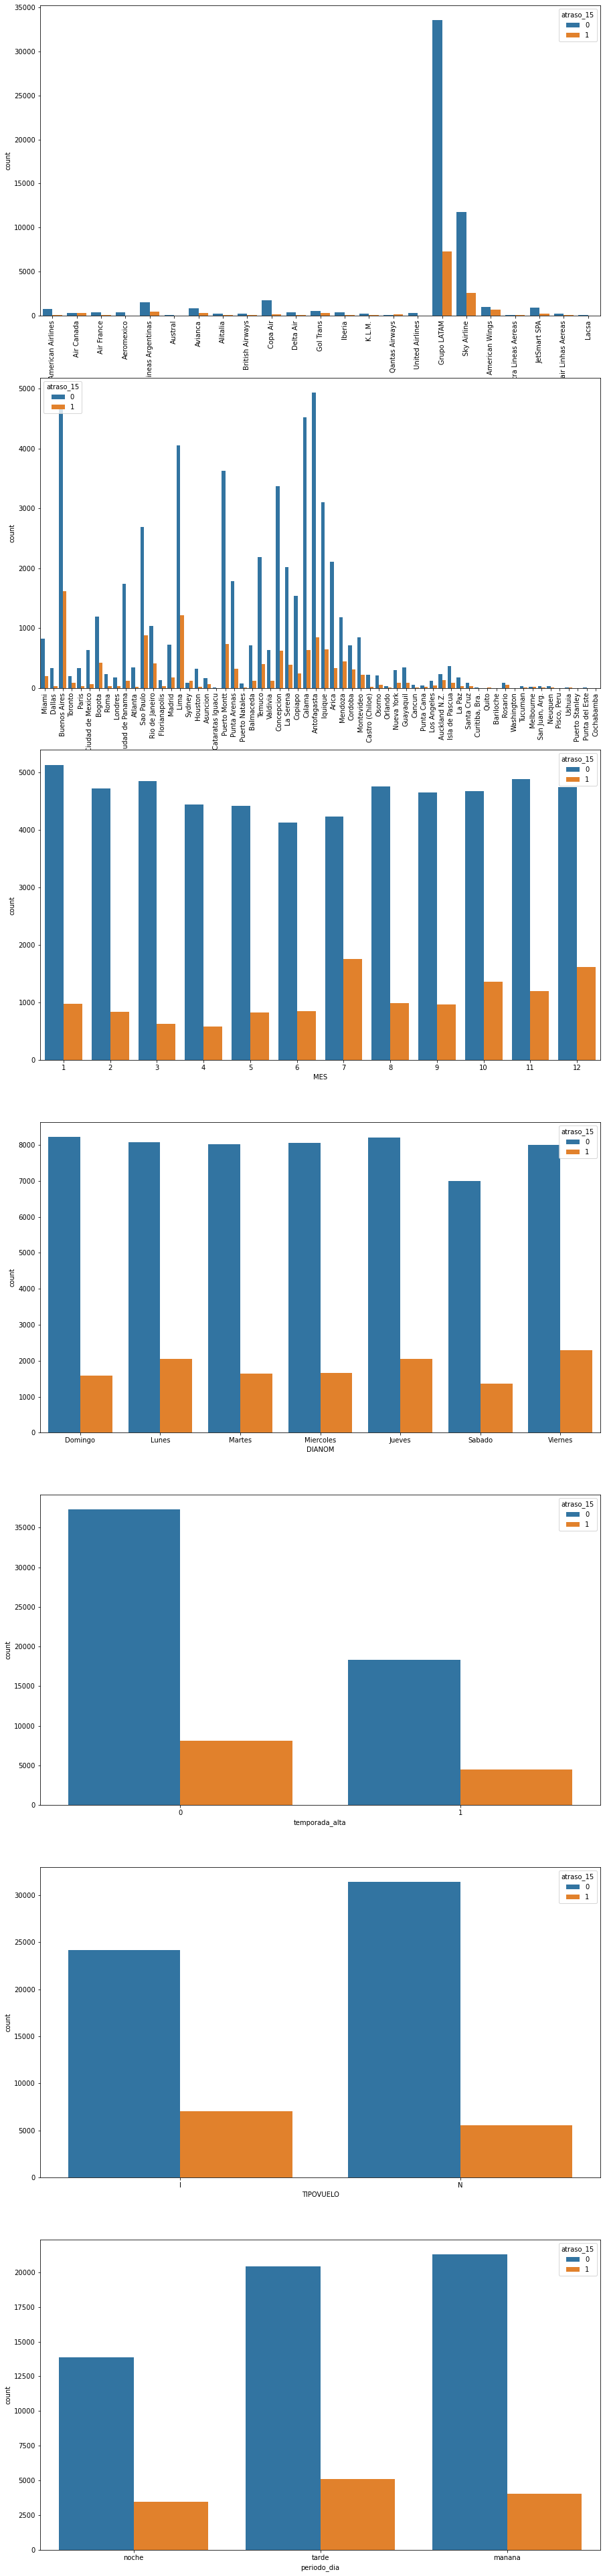

In [38]:
import seaborn as sns

fig, ax = plt.subplots(7,1, figsize=(15,70))
sns.countplot(x='OPERA', data = df, hue='atraso_15', ax = ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation = 90)
sns.countplot(x='SIGLADES', data = df, hue='atraso_15', ax = ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation = 90)
sns.countplot(x='MES', data = df, hue='atraso_15', ax = ax[2])
sns.countplot(x='DIANOM', data = df, hue='atraso_15', ax = ax[3])
sns.countplot(x='temporada_alta', data = df, hue='atraso_15', ax = ax[4])
sns.countplot(x='TIPOVUELO', data = df, hue='atraso_15', ax = ax[5])
sns.countplot(x='periodo_dia', data = df, hue='atraso_15', ax = ax[6])
plt.show()

Observando los graficos es posbible notar que hay una fuerte tendecia a los atrasos en ciertas aerolineas y destinos.

Tambien en cuanto a los meses, se ve que a medida que se acercan a los meses de temporada alta la tasa de atrasos sube, por lo tanto esta variable, junto con la variable "temporada_alta" podrian ser buenas variables explicativas

In [39]:
res_al = df[['OPERA','atraso_15']].groupby(by=['OPERA']).agg(Total=('OPERA', 'count'),
                                                             Atrasos=('atraso_15', 'sum'))

res_al['distrib_porc'] = (res_al['Total']/res_al['Total'].sum())*100
res_al['distrib_atrasos'] = (res_al['Atrasos']/res_al['Atrasos'].sum())*100
res_al['Tasa_atraso']= (res_al['Atrasos']/res_al['Total'])
res_al = res_al.sort_values("distrib_atrasos", ascending=False)
res_al['dist_acum_atrasos'] = res_al['distrib_atrasos'].cumsum()
res_al

,Total,Atrasos,distrib_porc,distrib_atrasos,Tasa_atraso,dist_acum_atrasos
OPERA,,,,,,
Grupo LATAM,40892,7306,59.953670,57.919772,0.178666,57.919772
Sky Airline,14298,2540,20.962965,20.136356,0.177647,78.056128
Latin American Wings,1674,681,2.454330,5.398763,0.406810,83.454891
Aerolineas Argentinas,1949,468,2.857520,3.710163,0.240123,87.165055
Avianca,1152,306,1.689001,2.425876,0.265625,89.590931
Gol Trans,806,287,1.181714,2.275250,0.356079,91.866180
Air Canada,565,258,0.828373,2.045346,0.456637,93.911527
JetSmart SPA,1095,196,1.605431,1.553829,0.178995,95.465356
Copa Air,1850,116,2.712371,0.919613,0.062703,96.384969


In [40]:
print('las tasa de atraso promedio por aerolinea es:', res_al['Tasa_atraso'].mean())

las tasa de atraso promedio por aerolinea es: 0.20508776966586575


De la tabla anterior se puede concluir que Grupo latam y sky airlines son los operadores con mayor cantidad de atrasos, concentrando casi el 80% de todos los atrasos, sin embargo su tasa de atraso esta por debajo del promedio.
Esto se debe a que concentran tambien la mayoria de los vuelos, es por eso que es esperable un volumen alto de atrasos, aún así el nivel de eficiecian podria considerarse bueno, comparando con las demas aerolineas. Justamente son las aerolineas con menor cantidad de vuelos las que tiene las mayores tasa de atraso como por ejemplo: aircanada, American Airlines.

Por lo tanto considero que sería una buena variable explicativa.

In [41]:
res_des = df[['SIGLADES','atraso_15']].groupby(by=['SIGLADES']).agg(Total=('SIGLADES', 'count'),
                                                             Atrasos=('atraso_15', 'sum'))

res_des['distrib_porc'] = (res_des['Total']/res_des['Total'].sum())*100
res_des['distrib_atrasos'] = (res_des['Atrasos']/res_des['Atrasos'].sum())*100
res_des['Tasa_atraso']= (res_des['Atrasos']/res_des['Total'])
res_des = res_des.sort_values("Total", ascending=False)
res_des['dist_acum_atrasos'] = res_des['distrib_atrasos'].cumsum()
res_des.head(20)

,Total,Atrasos,distrib_porc,distrib_atrasos,Tasa_atraso,dist_acum_atrasos
SIGLADES,,,,,,
Buenos Aires,6335,1620,9.288039,12.842873,0.255722,12.842873
Antofagasta,5786,847,8.483125,6.714761,0.146388,19.557634
Lima,5270,1214,7.726593,9.624227,0.230361,29.181861
Calama,5146,629,7.544791,4.986523,0.122231,34.168384
Puerto Montt,4357,734,6.388001,5.818931,0.168465,39.987316
Concepcion,3993,623,5.854324,4.938957,0.156023,44.926272
Iquique,3747,640,5.493652,5.073728,0.170803,50.000000
Sao Paulo,3569,881,5.232677,6.984303,0.246848,56.984303
Temuco,2589,403,3.795854,3.194863,0.155659,60.179166


En la siguiente tabla es posible notar en primer lugar, que los atrasos mas frecuentes se dan cuando los destinos estan más cerca de chile (dentro de sudamerica), esto probablemente porque también porque el volumen de vuelos dentro de sudamerica es alto.

In [42]:
res_des = res_des.sort_values("Tasa_atraso", ascending=False)
res_des['dist_acum_atrasos'] = res_des['distrib_atrasos'].cumsum()
res_des.head(10)

,Total,Atrasos,distrib_porc,distrib_atrasos,Tasa_atraso,dist_acum_atrasos
SIGLADES,,,,,,
Quito,2,2,0.002932,0.015855,1.000000,0.015855
Cochabamba,1,1,0.001466,0.007928,1.000000,0.023783
Puerto Stanley,1,1,0.001466,0.007928,1.000000,0.031711
Ushuia,6,4,0.008797,0.031711,0.666667,0.063422
Sydney,194,113,0.284432,0.895830,0.582474,0.959252
Melbourne,39,21,0.057180,0.166482,0.538462,1.125733
Bariloche,2,1,0.002932,0.007928,0.500000,1.133661
Rosario,136,54,0.199396,0.428096,0.397059,1.561757
Auckland N.Z.,361,135,0.529279,1.070239,0.373961,2.631996


Finalmente, también es destacable que aquellos destinos menos frecuentes, son los que tienen la mayor tasa de atrasos.

Por todo esto, consiedero que la varaible destino junto con la variable TIPOVUELO, podrían ser buenas predictoras.

En resumen, las varaibles candidatas que podrian entrar al modelo serán:

* OPERA
* SIGLADES
* MES
* temporada_alta
* TIPOVUELO

Adisionalmente se acrea una variable que detecta si hubo algun cambio de intinerario (de programado a operación)

In [43]:
df['cambio_itinerario'] = np.where(((df['cambio_vuelo']==1)|(df['cambio_Destino']==1)|(df['cambio_emp']==1)),1,0)

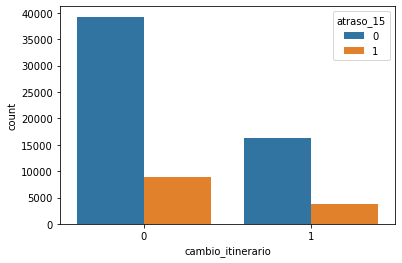

In [44]:
sns.countplot(x='cambio_itinerario', data = df, hue='atraso_15')
plt.show()

se observa que existe una tenencia al atraso cuando hay un cambio de itinerario

# 4. Entrena uno o varios modelos (usando el/los algoritmo(s) que prefieras) para estimar la probabilidad de atraso de un vuelo.

Para poder introducir la variable OPERA en el entrenamiento, se crean varaibles dummies, una por cada aerolinea

In [45]:
dummies_al = pd.get_dummies(df['OPERA'])
print(dummies_al.head(10))

   Aerolineas Argentinas  Aeromexico  Air Canada  Air France  Alitalia  \
0                      0           0           0           0         0   
1                      0           0           0           0         0   
2                      0           0           0           0         0   
3                      0           0           0           0         0   
4                      0           0           0           0         0   
5                      0           0           0           0         0   
6                      0           0           0           0         0   
7                      0           0           0           0         0   
8                      0           0           0           0         0   
9                      0           0           0           0         0   

   American Airlines  Austral  Avianca  British Airways  Copa Air  ...  \
0                  1        0        0                0         0  ...   
1                  1        0        

In [46]:
dummies_al

,Aerolineas Argentinas,Aeromexico,Air Canada,Air France,Alitalia,American Airlines,Austral,Avianca,British Airways,Copa Air,...,Iberia,JetSmart SPA,K.L.M.,Lacsa,Latin American Wings,Oceanair Linhas Aereas,Plus Ultra Lineas Aereas,Qantas Airways,Sky Airline,United Airlines
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
68202,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
68203,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
68204,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


se reemplazan los valores de la variable tipo de vuelo, por valores numéricos

In [47]:
dic = {}

key = df['TIPOVUELO'].unique()
values = np.array(range(df['TIPOVUELO'].nunique()))
dict_from_list = dict(zip(key, values))
dic['TIPOVUELO'] = dict_from_list

In [48]:
dict_from_list

{'I': 0, 'N': 1}

In [49]:
df = df.replace(dic)

Se crea df_train, que será base que contiene las varaiables explicativas con las cuales se entrenará el modelo

In [50]:
df_train = pd.concat([df[['MES','temporada_alta','TIPOVUELO', 'cambio_itinerario']], dummies_al], axis=1)
df_train.head(5)

,MES,temporada_alta,TIPOVUELO,cambio_itinerario,Aerolineas Argentinas,Aeromexico,Air Canada,Air France,Alitalia,American Airlines,...,Iberia,JetSmart SPA,K.L.M.,Lacsa,Latin American Wings,Oceanair Linhas Aereas,Plus Ultra Lineas Aereas,Qantas Airways,Sky Airline,United Airlines
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Se crea variable objetivo con la cual se entrena el modelo

In [51]:
y = df['atraso_15']

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


#Se separa la base de entrenamiento en train(70%) y test(30%)
#Se utilizar random_state=42 para poder hacer replicable el modelo

x_train, x_test, y_train, y_test = train_test_split(df_train, y, test_size=0.3, random_state=42)

**REGRESION LOGISTICA**

Con GridSearch se pueden probar multiples valores para todos los hiper paramentros de los algoritmos de machine learning.

Se ajustan los hiper paraemtros, tolerancia para el criterio de detención (tol) y la fuerza de la regularización (C). 

Puesto que la idea es optimizar el nivel de acierto de la ocurrencia del evento (retraso del vuelo), se probará la combinación que optimice la **precisión** del modelo. Solo se probaran 4 valores, ya que el algorito demorará más a medida se agregan valores a probar.

In [53]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

param_grid = {'tol': [0.0000001, 0.0001, 0.01, 1],
              'C': [1, 10, 100, 10000]}

grid = GridSearchCV(log_reg, param_grid, scoring='precision')

%time grid.fit(x_train, y_train)
print(grid.best_params_)

log_reg = grid.best_estimator_
y_pred_lr = log_reg.predict(x_test)

CPU times: user 1min 45s, sys: 1.14 s, total: 1min 46s
Wall time: 17.9 s
{'C': 100, 'tol': 1e-07}


Usualmente las tecnicas que dan muy buenos resultados son aquellas que son ensables de arboles de decision.

Las principales causas de error en el aprendizaje se deben al ruido, el Bias y el variance. EL Ensemble ayuda a minimizar estos factores. Estos métodos están diseñados para mejorar la estabilidad y precisión de los algoritmos de aprendizaje automático. Las combinaciones de múltiples clasificadores disminuyen la varianza, especialmente en el caso de clasificadores inestables, y pueden producir una clasificación más confiable que un solo clasificador.

En particular se probaran **Random Forest** que es un bagging de los los arboles de decisión y **Gradiente Boosting** que ses un boosting de los árboles de decisión.

Ambos metodos tienen ventajas y desventajas, pero generamente los metodos boosting son mejores. 

Acontinuación se calcularan ambos y luego se veran los mejores resultados.

**RANDOM FOREST**

Particularmente para Random Forest y gradient boosting, tanto la cantidad de arboles de decision y la profundidad son de los parametros más importantes, por lo tanto se probara la combinación que optimice la **precisión** del modelo.

In [54]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

param_grid = {'n_estimators': [100, 200, 300, 400],
              'max_depth': [None, 1, 2, 3]}

grid = GridSearchCV(rf, param_grid, scoring='precision')

%time grid.fit(x_train, y_train)
print(grid.best_params_)


rf = grid.best_estimator_
y_pred_rf = rf.predict(x_test)

CPU times: user 2min 20s, sys: 1.24 s, total: 2min 21s
Wall time: 2min 21s
{'max_depth': None, 'n_estimators': 200}


**GRADIENT BOOSTING**

In [55]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()

param_grid = {'n_estimators': [100, 200, 300, 400],
              'max_depth': [None, 1, 2, 3]}

grid = GridSearchCV(gb, param_grid, scoring='precision')

%time grid.fit(x_train, y_train)
print(grid.best_params_)


gb = grid.best_estimator_
y_pred_gb = gb.predict(x_test)

CPU times: user 7min 24s, sys: 6.13 s, total: 7min 30s
Wall time: 7min 30s
{'max_depth': 1, 'n_estimators': 200}


# 5. Evalúa tu modelo. ¿Qué performance tiene? ¿Qué métricas usaste para evaluar esa performance y por qué? ¿Por qué elegiste ese algoritmo en particular? ¿Qué variables son las que más influyen en la predicción? ¿Cómo podrías mejorar la performance?

Elegí ambos algoritmos porque son los que he probado con mejores resultados, particularmente prefiero gradiente boosting porque se trata de un metodo de esamble que recoje de mejor manera la interaccion entre las variables explicativas y la variable respuesta

Las metricas que ocuparé para evaluar los modelos son:
* Error cuadratico medio (RMSE), para ver el nivel de acierto del modelo tanto train como en test
* R2

In [56]:
from sklearn.metrics import mean_squared_error

r2=log_reg.score(x_test, y_test)
y_train_predict = log_reg.predict(x_train)
rmse_train = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
rmse_test = (np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print('RMSE del entrenamiento es {}'.format(rmse_train))
print('RMSE del test es {}'.format(rmse_test))
print('R2 score es {}'.format(r2))

RMSE del entrenamiento es 0.4281483293872634
RMSE del test es 0.4303167611256606
R2 score es 0.8148274850943212


In [57]:
r2=rf.score(x_test, y_test)
y_train_predict = rf.predict(x_train)
rmse_train = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
rmse_test = (np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print('RMSE del entrenamiento es {}'.format(rmse_train))
print('RMSE del test es {}'.format(rmse_test))
print('R2 score es {}'.format(r2))

RMSE del entrenamiento es 0.42372265070267207
RMSE del test es 0.4303167611256606
R2 score es 0.8177597497800801


In [58]:
r2=gb.score(x_test, y_test)
y_train_predict = gb.predict(x_train)
rmse_train = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
rmse_test = (np.sqrt(mean_squared_error(y_test, y_pred_gb)))
print('RMSE del entrenamiento es {}'.format(rmse_train))
print('RMSE del test es {}'.format(rmse_test))
print('R2 score es {}'.format(r2))

RMSE del entrenamiento es 0.4285639481346403
RMSE del test es 0.4321866037753209
R2 score es 0.8132147395171537


Al comparar los 3 modelos es posible notar que todos tienen metricas muy similares, pero dado a que se observa menor sobre ajuste con gradiente boost, se elige como el mejor modelo.

In [59]:
feature_names = df_train.columns

for feature in zip(feature_names, gb.feature_importances_): 
    print(feature)

('MES', 0.25722286753483586)
('temporada_alta', 0.019135413432889645)
('TIPOVUELO', 0.20078587842640616)
('cambio_itinerario', 0.0)
('Aerolineas Argentinas', 0.0)
('Aeromexico', 0.021344038551492767)
('Air Canada', 0.06033216227224239)
('Air France', 0.007772622184119303)
('Alitalia', 0.003899587025506947)
('American Airlines', 0.02751334505792149)
('Austral', 0.0)
('Avianca', 0.004131611701803215)
('British Airways', 0.0)
('Copa Air', 0.08718515297093975)
('Delta Air', 0.01426510062945199)
('Gol Trans', 0.03232046698872402)
('Grupo LATAM', 0.0)
('Iberia', 0.005589454634847004)
('JetSmart SPA', 0.0)
('K.L.M.', 0.010249917337812406)
('Lacsa', 0.0010120525265947151)
('Latin American Wings', 0.17354010169816927)
('Oceanair Linhas Aereas', 0.0035094448768982823)
('Plus Ultra Lineas Aereas', 0.006174753448027102)
('Qantas Airways', 0.046857329572480365)
('Sky Airline', 0.0)
('United Airlines', 0.017158699128837475)


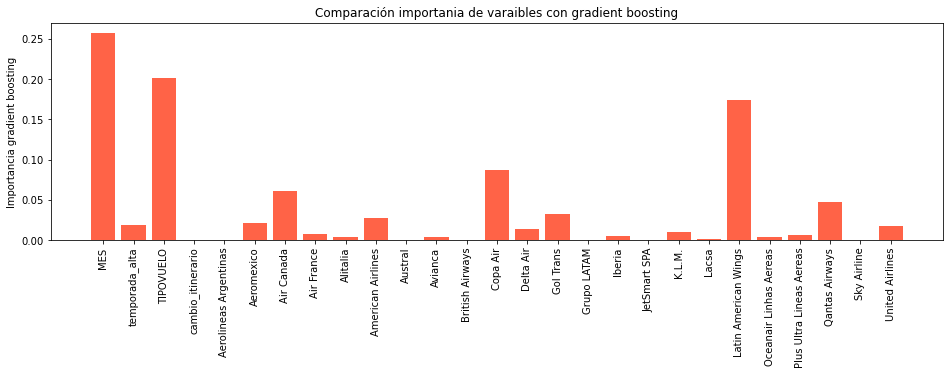

In [60]:
# Create a bar chart for visualizing the mutual information scores
plt.figure(figsize=(16,4))
plt.bar(x=feature_names, height=gb.feature_importances_, color='tomato')
plt.xticks(rotation='vertical')
plt.ylabel('Importancia gradient boosting')
plt.title('Comparación importania de varaibles con gradient boosting')

plt.show()

Las variables que más influyen en la predicción son MES, TIPOVUELO, Latin American Wings

para mejorar las predicciones con las mismas variables explicativas, quizas probando otros hiper paremetros o valanceando un poco más la variables objetivo.

También se podrian agregar nuevas variables, tales como la distancia que existe entre el origen y el destino, se puede conocer las coordenadas de las ciudades y con ellas obtner la distancia.